In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 读取Excel文件
file1_path = 'data\\附件1-白酒样本品评打分.xlsx'
file2_path = 'data\\附件2-微量成分指标数据.xlsx'

# 查看第一个文件的所有sheet
excel_file1 = pd.ExcelFile(file1_path)
print("附件1-白酒样本品评打分.xlsx包含的工作表：")
for i, sheet in enumerate(excel_file1.sheet_names, 1):
    print(f"{i}. {sheet}")

print("\n" + "="*50 + "\n")

# 查看第二个文件的所有sheet
excel_file2 = pd.ExcelFile(file2_path)
print("附件2-微量成分指标数据.xlsx包含的工作表：")
for i, sheet in enumerate(excel_file2.sheet_names, 1):
    print(f"{i}. {sheet}")

附件1-白酒样本品评打分.xlsx包含的工作表：
1. A组白酒品尝评分
2. B组白酒品尝评分


附件2-微量成分指标数据.xlsx包含的工作表：
1. 微量成分指标数据


In [5]:
# 读取A组白酒品尝评分数据
df_A = pd.read_excel(file1_path, sheet_name='A组白酒品尝评分')
print("A组白酒品尝评分数据：")
print(f"数据形状：{df_A.shape}")
print(f"列名：{list(df_A.columns)}")
print("\n前5行数据：")
print(df_A.head())

print("\n" + "="*50 + "\n")

# 读取B组白酒品尝评分数据
df_B = pd.read_excel(file1_path, sheet_name='B组白酒品尝评分')
print("B组白酒品尝评分数据：")
print(f"数据形状：{df_B.shape}")
print(f"列名：{list(df_B.columns)}")
print("\n前5行数据：")
print(df_B.head())

print("\n" + "="*50 + "\n")

# 读取微量成分指标数据
df_components = pd.read_excel(file2_path, sheet_name='微量成分指标数据')
print("微量成分指标数据：")
print(f"数据形状：{df_components.shape}")
print(f"列名：{list(df_components.columns)}")
print("\n前5行数据：")
print(df_components.head())

A组白酒品尝评分数据：
数据形状：(209, 8)
列名：['数据来源：大模型生成数据。', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']

前5行数据：
  数据来源：大模型生成数据。 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0      A组白酒品尝评分        NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN        NaN   
2         白酒样品1        NaN      品酒员1号      品酒员2号      品酒员3号      品酒员4号   
3           NaN        NaN         分数         分数         分数         分数   
4          色 10     澄清度 10          9          9          9         10   

  Unnamed: 6 Unnamed: 7  
0        NaN        NaN  
1        NaN        NaN  
2      品酒员5号      品酒员6号  
3         分数         分数  
4         10          9  


B组白酒品尝评分数据：
数据形状：(209, 8)
列名：['数据来源：大模型生成数据。', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']

前5行数据：
  数据来源：大模型生成数据。 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0      B组白酒品尝评分  

##### 数据清洗

In [6]:
# 处理A组白酒品尝评分数据
# 读取正确的表头和数据
df_A_clean = pd.read_excel(file1_path, sheet_name='A组白酒品尝评分', header=2)
# 删除空列
df_A_clean = df_A_clean.dropna(axis=1, how='all')
# 重新命名列
df_A_clean.columns = ['评价项目', '澄清度'] + [f'品酒员{i}号' for i in range(1, len(df_A_clean.columns)-1)]

print("A组白酒品尝评分数据（清理后）：")
print(f"数据形状：{df_A_clean.shape}")
print("\n前10行数据：")
print(df_A_clean.head(10))

print("\n" + "="*50 + "\n")

# 处理B组白酒品尝评分数据
df_B_clean = pd.read_excel(file1_path, sheet_name='B组白酒品尝评分', header=2)
# 删除空列
df_B_clean = df_B_clean.dropna(axis=1, how='all')
# 重新命名列
df_B_clean.columns = ['评价项目', '澄清度'] + [f'品酒员{i}号' for i in range(1, len(df_B_clean.columns)-1)]

print("B组白酒品尝评分数据（清理后）：")
print(f"数据形状：{df_B_clean.shape}")
print("\n前10行数据：")
print(df_B_clean.head(10))

A组白酒品尝评分数据（清理后）：
数据形状：(207, 8)

前10行数据：
    评价项目       澄清度  品酒员1号  品酒员2号  品酒员3号  品酒员4号  品酒员5号  品酒员6号
0  白酒样品1       NaN  品酒员1号  品酒员2号  品酒员3号  品酒员4号  品酒员5号  品酒员6号
1    NaN       NaN     分数     分数     分数     分数     分数     分数
2   色 10    澄清度 10      9      9      9     10     10      9
3   香 30     浓度 10      4      4      4      4      3      4
4    NaN    协调度 10      8      8      8      7      7      8
5    NaN  香气持久度 10      5      5      4      6      5      6
6   味 50    柔和度 10      6      7      8      7      8      7
7    NaN    丰满度 10      5      6      5      5      6      5
8    NaN    纯净度 10      9      8      8      9      8      8
9    NaN    持久度 10      4      4      6      4      4      5


B组白酒品尝评分数据（清理后）：
数据形状：(207, 8)

前10行数据：
    评价项目       澄清度  品酒员1号  品酒员2号  品酒员3号  品酒员4号  品酒员5号  品酒员6号
0  白酒样品1       NaN  品酒员1号  品酒员2号  品酒员3号  品酒员4号  品酒员5号  品酒员6号
1    NaN       NaN     分数     分数     分数     分数     分数     分数
2   色 10    澄清度 10      8      9      8      9     10     10
3  

In [7]:

df_components_clean = pd.read_excel(file2_path, sheet_name='微量成分指标数据', header=0)
# 删除空列
df_components_clean = df_components_clean.dropna(axis=1, how='all')
# 删除第一列（数据来源说明）
df_components_clean = df_components_clean.iloc[:, 1:]

# 重新命名列，第一行为列名
new_columns = df_components_clean.iloc[0].tolist()
df_components_clean.columns = new_columns
df_components_clean = df_components_clean.drop(df_components_clean.index[0])

print("微量成分指标数据（清理后）：")
print(f"数据形状：{df_components_clean.shape}")
print("\n列名：")
for i, col in enumerate(df_components_clean.columns, 1):
    print(f"{i}. {col}")

print("\n前5行数据：")
print(df_components_clean.head())

微量成分指标数据（清理后）：
数据形状：(23, 55)

列名：
1. F1 己酸乙酯(mg/L)
2. F2 甲酸异戊酯(mg/L)
3. F3 乳酸乙酯(mg/L)
4. F4 丁酸乙酯(mg/L)
5. F5 乙酸乙酯(mg/L)
6. F6 戊酸乙酯(mg/L)
7. F7 甲酸丁酯(mg/L)
8. F8 2,2-二乙氧基乙酸乙酯(mg/L)
9. F9 庚酸乙酯(mg/L)
10. F10 甲酸烯丙酯(mg/L)
11. F11 辛酸乙酯(mg/L)
12. F12 己酸异戊酯(mg/L)
13. F13 肼基甲酸乙酯(mg/L)
14. F14 棕榈酸乙酯(mg/L)
15. F15 异戊酸乙酯(mg/L)
16. F16 苯乙酸乙酯(mg/L)
17. F17 丁二酸二乙酯(mg/L)
18. F18 正丙醇(mg/L)
19. F19 活性戊醇(mg/L)
20. F20 2-戊醇(mg/L)
21. F21 异丁醇(mg/L)
22. F22 2,3-丁二醇(mg/L)
23. F23 甲醇(mg/L)
24. F24 正己醇(mg/L)
25. F25 正丁醇(mg/L)
26. F26 2-丁醇(mg/L)
27. F27 苯乙醇(mg/L)
28. F28 异戊醇(mg/L)
29. F29 (2R,3R)-(-)-2,3-丁二醇(mg/L)
30. F30 丙二醇(mg/L)
31. F31 3-呋喃甲醇(mg/L)
32. F32 正戊醇(mg/L)
33. F33 己酸(mg/L)
34. F34 丁酸(mg/L)
35. F35 乙酸(mg/L)
36. F36 丙酸(mg/L)
37. F37 正戊酸(mg/L)
38. F38 3-甲基戊酸(mg/L)
39. F39 辛酸(mg/L)
40. F40 2-戊酮(mg/L)
41. F41 3-羟基-2-丁酮(mg/L)
42. F42 3-甲基丁醛(mg/L)
43. F43 乙醛(mg/L)
44. F44 糠醛(mg/L)
45. F45 3-糠醛(mg/L)
46. F46 异戊醛(mg/L)
47. F47 2-甲基丁醛(mg/L)
48. F48 异丁醛二乙缩醛(mg/L)
49. F49 丁醛二乙缩醛(mg/L)
50. F50 1,1-二乙氧基乙烷(mg/L)


In [8]:
# 提取样品编号作为第一列
sample_ids = df_components_clean.index + 1
sample_ids = [f"白酒样品{i}" for i in sample_ids]
df_components_clean.insert(0, '样品编号', sample_ids)

print("微量成分指标数据（添加样品编号后）：")
print(f"数据形状：{df_components_clean.shape}")
print("\n前5行数据：")
print(df_components_clean.head())

# 查看样品编号
print("\n样品编号：")
print(df_components_clean['样品编号'].tolist())

微量成分指标数据（添加样品编号后）：
数据形状：(23, 56)

前5行数据：
    样品编号 F1 己酸乙酯(mg/L) F2 甲酸异戊酯(mg/L) F3 乳酸乙酯(mg/L) F4 丁酸乙酯(mg/L)  \
1  白酒样品2          11.3          190.4         380.6           8.5   
2  白酒样品3         134.8          303.9         603.4         119.4   
3  白酒样品4        1556.2          237.4         444.6           212   
4  白酒样品5        1422.2          162.6           294         226.9   
5  白酒样品6        2296.5          371.7         535.5         265.4   

  F5 乙酸乙酯(mg/L) F6 戊酸乙酯(mg/L) F7 甲酸丁酯(mg/L) F8 2,2-二乙氧基乙酸乙酯(mg/L)  \
1         896.6             0           6.5                     0   
2         896.3         126.7             0                     0   
3         504.9          78.3         124.9                     2   
4         379.9          45.5          50.2                     0   
5         362.6           200            52                     0   

  F9 庚酸乙酯(mg/L)  ... F46 异戊醛(mg/L) F47 2-甲基丁醛(mg/L) F48 异丁醛二乙缩醛(mg/L)  \
1             0  ...             0                0     

In [9]:
# 处理A组品酒数据，提取每个样品的各项评分
def extract_sample_scores(df):
    """提取每个样品的评分数据"""
    samples = []
    scores = []
    
    current_sample = None
    current_scores = {}
    
    for idx, row in df.iterrows():
        if str(row['评价项目']).startswith('白酒样品'):
            # 新样品开始
            if current_sample is not None:
                # 保存前一个样品的数据
                samples.append(current_sample)
                scores.append(current_scores.copy())
                
            current_sample = row['评价项目']
            current_scores = {}
        elif pd.notna(row['评价项目']) and str(row['评价项目']).strip() != '':
            # 评分项目
            item = str(row['评价项目']).split()[0]  # 提取项目名称（色、香、味等）
            # 计算平均分（忽略前两列）
            score_cols = [col for col in df.columns if col.startswith('品酒员')]
            if len(score_cols) > 0:
                avg_score = pd.to_numeric(row[score_cols], errors='coerce').mean()
                current_scores[item] = avg_score
    
    # 保存最后一个样品
    if current_sample is not None:
        samples.append(current_sample)
        scores.append(current_scores.copy())
    
    # 转换为DataFrame
    scores_df = pd.DataFrame(scores)
    scores_df.insert(0, '样品编号', samples)
    
    return scores_df

# 提取A组和B组的样品评分
df_A_scores = extract_sample_scores(df_A_clean)
df_B_scores = extract_sample_scores(df_B_clean)

print("A组样品评分数据：")
print(f"数据形状：{df_A_scores.shape}")
print("\n前5行数据：")
print(df_A_scores.head())

print("\n" + "="*50 + "\n")

print("B组样品评分数据：")
print(f"数据形状：{df_B_scores.shape}")
print("\n前5行数据：")
print(df_B_scores.head())

A组样品评分数据：
数据形状：(16, 5)

前5行数据：
    样品编号          色         香         味      整体评价
0  白酒样品1   9.333333  3.833333  7.166667  6.666667
1  白酒样品2   9.833333  6.000000  4.666667  7.500000
2  白酒样品3   9.666667  8.166667  8.000000  8.333333
3  白酒样品4   9.666667  7.000000  7.666667  7.500000
4  白酒样品5  10.000000  9.833333  8.833333  9.166667


B组样品评分数据：
数据形状：(16, 5)

前5行数据：
    样品编号         色         香         味      整体评价
0  白酒样品1  9.000000  4.000000  7.833333  6.166667
1  白酒样品2  9.833333  5.500000  5.000000  7.166667
2  白酒样品3  9.833333  9.000000  7.833333  8.666667
3  白酒样品4  9.833333  7.833333  8.166667  7.833333
4  白酒样品5  9.166667  9.500000  9.000000  8.833333


In [10]:
# 合并A组和B组的评分数据，计算平均值
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# 合并A组和B组数据
merged_scores = pd.merge(df_A_scores, df_B_scores, on='样品编号', suffixes=('_A', '_B'))

# 计算平均评分
score_columns = ['色', '香', '味', '整体评价']
for col in score_columns:
    merged_scores[col] = (merged_scores[f'{col}_A'] + merged_scores[f'{col}_B']) / 2

# 选择需要的列
final_scores = merged_scores[['样品编号'] + score_columns]

print("合并后的平均评分数据：")
print(f"数据形状：{final_scores.shape}")
print("\n前5行数据：")
print(final_scores.head())

# 检查微量成分数据中的样品编号
print("\n微量成分数据中的样品编号：")
print(df_components_clean['样品编号'].tolist())

# 检查评分数据中的样品编号
print("\n评分数据中的样品编号：")
print(final_scores['样品编号'].tolist())

合并后的平均评分数据：
数据形状：(16, 5)

前5行数据：
    样品编号         色         香         味      整体评价
0  白酒样品1  9.166667  3.916667  7.500000  6.416667
1  白酒样品2  9.833333  5.750000  4.833333  7.333333
2  白酒样品3  9.750000  8.583333  7.916667  8.500000
3  白酒样品4  9.750000  7.416667  7.916667  7.666667
4  白酒样品5  9.583333  9.666667  8.916667  9.000000

微量成分数据中的样品编号：
['白酒样品2', '白酒样品3', '白酒样品4', '白酒样品5', '白酒样品6', '白酒样品7', '白酒样品8', '白酒样品9', '白酒样品10', '白酒样品11', '白酒样品12', '白酒样品13', '白酒样品14', '白酒样品15', '白酒样品16', '白酒样品17', '白酒样品18', '白酒样品19', '白酒样品20', '白酒样品21', '白酒样品22', '白酒样品23', '白酒样品24']

评分数据中的样品编号：
['白酒样品1', '白酒样品2', '白酒样品3', '白酒样品4', '白酒样品5', '白酒样品6', '白酒样品7', '白酒样品8', '白酒样品9', '白酒样品10', '白酒样品11', '白酒样品12', '白酒样品13', '白酒样品14', '白酒样品15', '白酒样品16']


In [11]:
# 对齐样品编号，只保留共同的样品
common_samples = set(final_scores['样品编号']) & set(df_components_clean['样品编号'])
print(f"共同的样品编号：{sorted(list(common_samples))}")

# 筛选共同样品的数据
scores_filtered = final_scores[final_scores['样品编号'].isin(common_samples)].sort_values('样品编号')
components_filtered = df_components_clean[df_components_clean['样品编号'].isin(common_samples)].sort_values('样品编号')

print(f"\n筛选后的评分数据形状：{scores_filtered.shape}")
print(f"筛选后的成分数据形状：{components_filtered.shape}")

# 重置索引
scores_filtered = scores_filtered.reset_index(drop=True)
components_filtered = components_filtered.reset_index(drop=True)

print("\n筛选后的评分数据前5行：")
print(scores_filtered.head())

print("\n筛选后的成分数据前5行：")
print(components_filtered.head())

共同的样品编号：['白酒样品10', '白酒样品11', '白酒样品12', '白酒样品13', '白酒样品14', '白酒样品15', '白酒样品16', '白酒样品2', '白酒样品3', '白酒样品4', '白酒样品5', '白酒样品6', '白酒样品7', '白酒样品8', '白酒样品9']

筛选后的评分数据形状：(15, 5)
筛选后的成分数据形状：(15, 56)

筛选后的评分数据前5行：
     样品编号         色         香         味      整体评价
0  白酒样品10  9.666667  9.166667  8.166667  8.750000
1  白酒样品11  9.500000  8.916667  8.000000  8.750000
2  白酒样品12  9.666667  4.166667  6.750000  6.833333
3  白酒样品13  9.583333  7.333333  7.750000  8.083333
4  白酒样品14  9.333333  6.083333  6.333333  7.333333

筛选后的成分数据前5行：
     样品编号 F1 己酸乙酯(mg/L) F2 甲酸异戊酯(mg/L) F3 乳酸乙酯(mg/L) F4 丁酸乙酯(mg/L)  \
0  白酒样品10        1910.5          448.3         438.1         268.9   
1  白酒样品11        1904.3          144.7         431.4           277   
2  白酒样品12        1651.5          165.2         510.9         291.2   
3  白酒样品13           8.8          292.8         406.7           1.7   
4  白酒样品14        1681.4          142.2         373.6           209   

  F5 乙酸乙酯(mg/L) F6 戊酸乙酯(mg/L) F7 甲酸丁酯(mg/L) F8 2,2-二乙氧基乙酸乙酯(

##### Spearman相关性分析

In [12]:
# 进行Spearman相关性分析
components_data = components_filtered.iloc[:, 1:]  # 去掉第一列（样品编号）
components_columns = components_data.columns.tolist()

# 存储相关性结果
correlation_results = {}

# 对每个感官评价指标进行分析
for score_col in score_columns:
    correlations = []
    p_values = []
    
    # 计算与每个成分的Spearman相关系数
    for comp_col in components_columns:
        # 计算Spearman相关系数和p值
        corr, p_value = spearmanr(scores_filtered[score_col], components_data[comp_col])
        correlations.append(corr)
        p_values.append(p_value)
    
    # 保存结果
    correlation_results[score_col] = pd.DataFrame({
        '成分': components_columns,
        'Spearman相关系数': correlations,
        'p值': p_values,
        '显著性': [p < 0.05 for p in p_values]  # 显著性水平0.05
    }).sort_values('Spearman相关系数', key=abs, ascending=False)

# 显示结果
for score_col in score_columns:
    print(f"\n{score_col}评分与微量成分的Spearman相关性分析（前10个最相关的成分）：")
    print("="*80)
    print(correlation_results[score_col].head(10).to_string(index=False))


色评分与微量成分的Spearman相关性分析（前10个最相关的成分）：
                           成分  Spearman相关系数       p值   显著性
          F55 2-羟基乙基己酸酯(mg/L)      0.637524 0.010568  True
             F31 3-呋喃甲醇(mg/L)      0.592624 0.019907  True
               F2 甲酸异戊酯(mg/L)      0.576077 0.024604  True
               F19 活性戊醇(mg/L)      0.554474 0.031948  True
                F21 异丁醇(mg/L)      0.547273 0.034729  True
                F3 乳酸乙酯(mg/L)      0.534671 0.040027  True
             F17 丁二酸二乙酯(mg/L)      0.534060 0.040298  True
             F38 3-甲基戊酸(mg/L)      0.528472 0.042843  True
F29 (2R,3R)-(-)-2,3-丁二醇(mg/L)      0.518932 0.047461  True
         F50 1,1-二乙氧基乙烷(mg/L)      0.486065 0.066202 False

香评分与微量成分的Spearman相关性分析（前10个最相关的成分）：
                  成分  Spearman相关系数       p值   显著性
    F13 肼基甲酸乙酯(mg/L)      0.612601 0.015188  True
       F6 戊酸乙酯(mg/L)      0.594812 0.019342  True
       F25 正丁醇(mg/L)      0.516640 0.048624  True
      F45 3-糠醛(mg/L)      0.512958 0.050534 False
        F23 甲醇(mg/L)     -0

相关性热力图已保存为 spearman_correlation_heatmap.png
显著相关性柱状图已保存为 significant_correlations.png


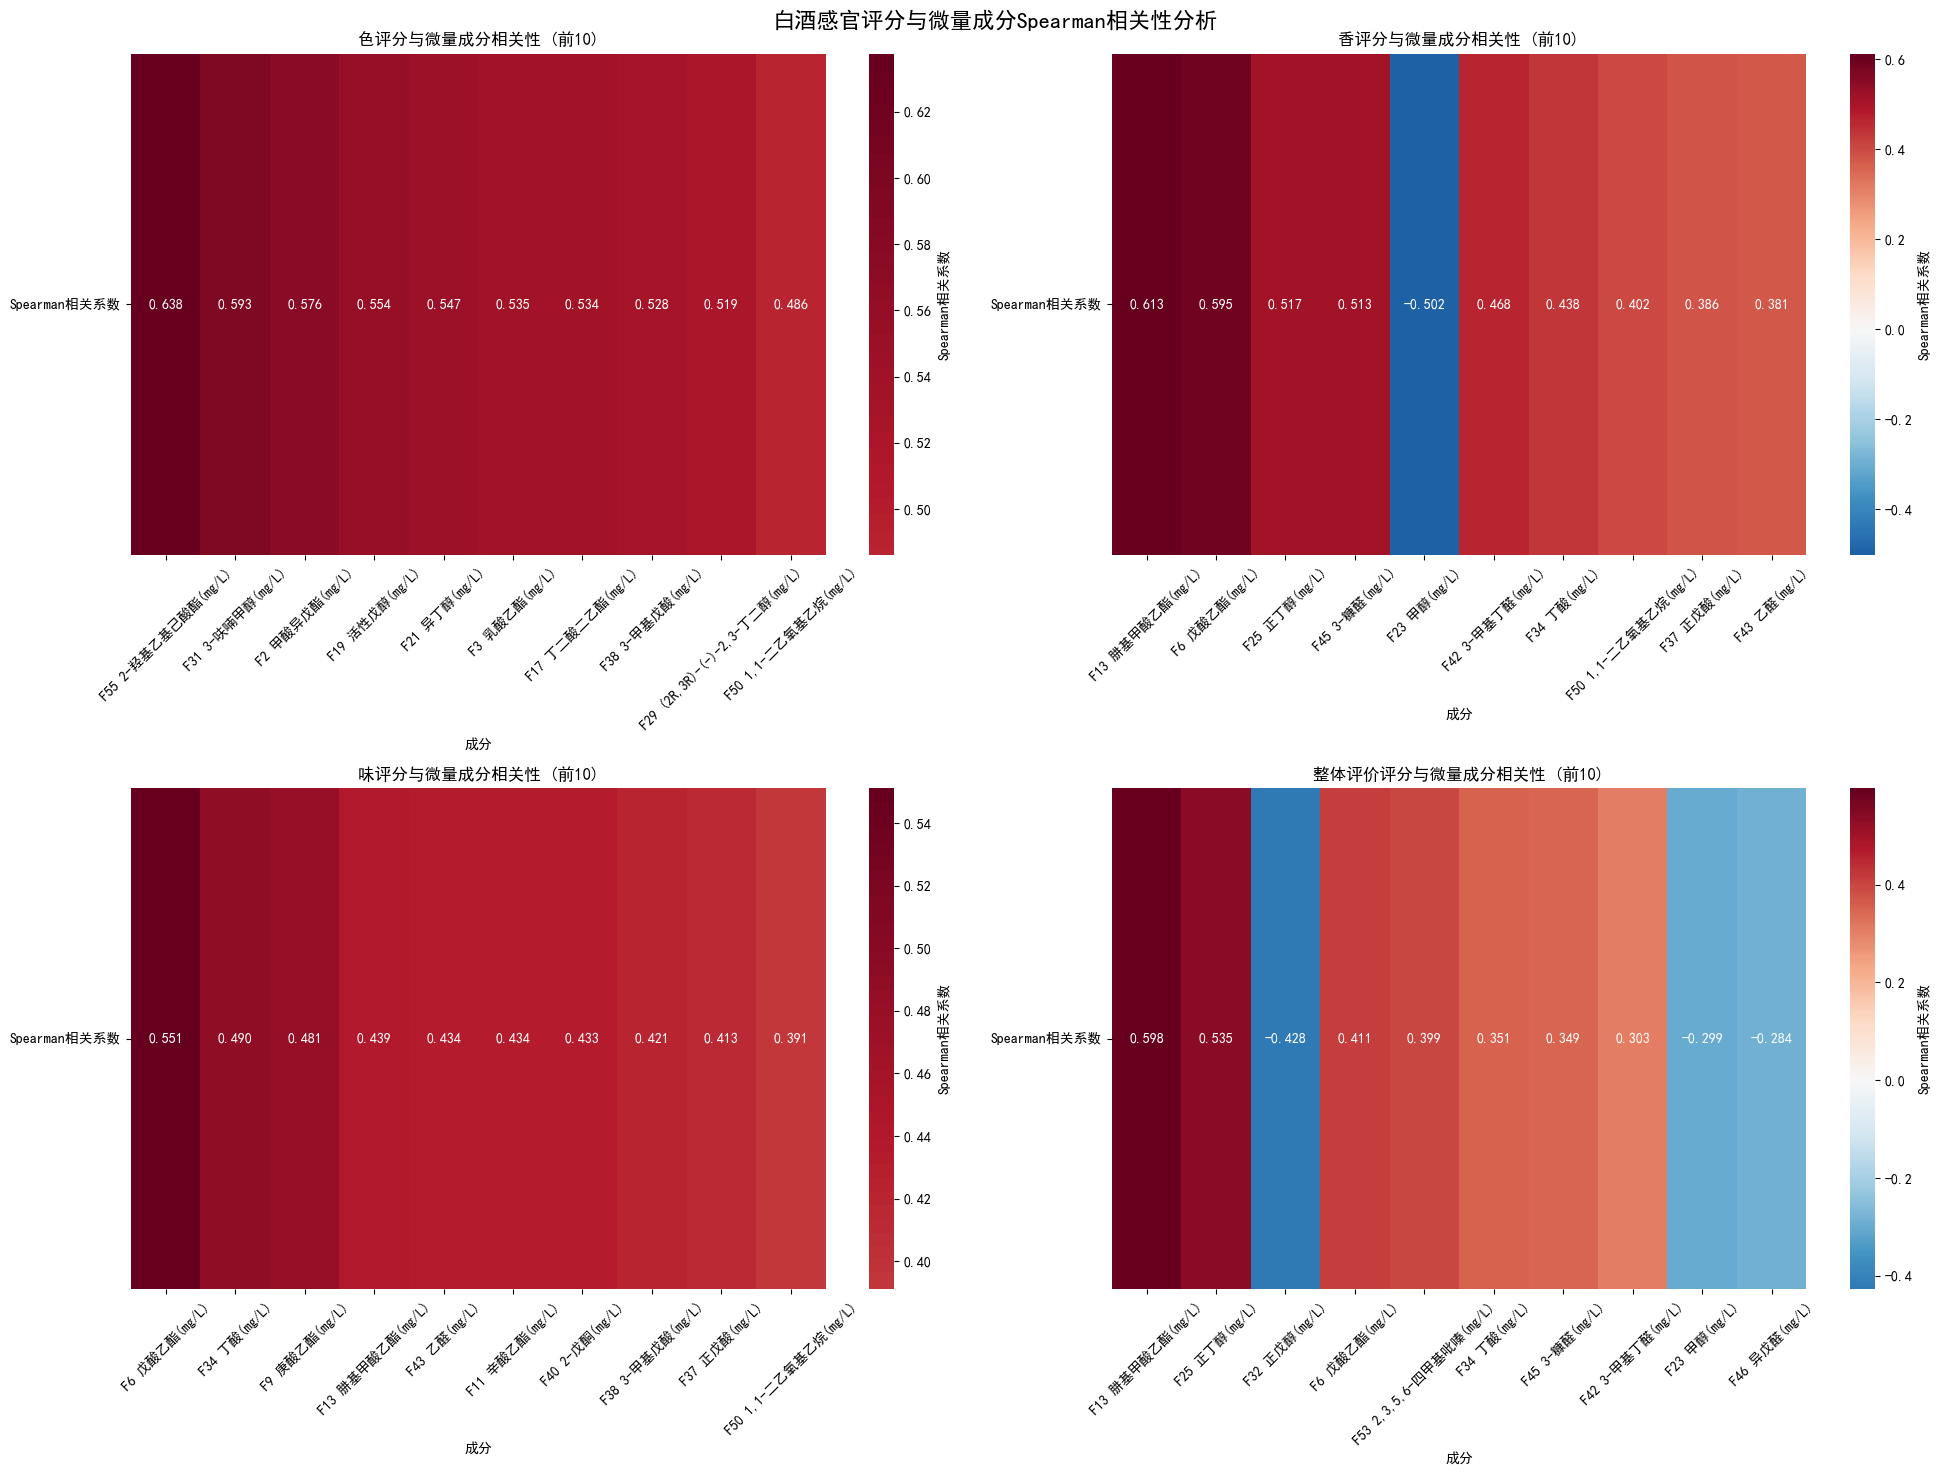

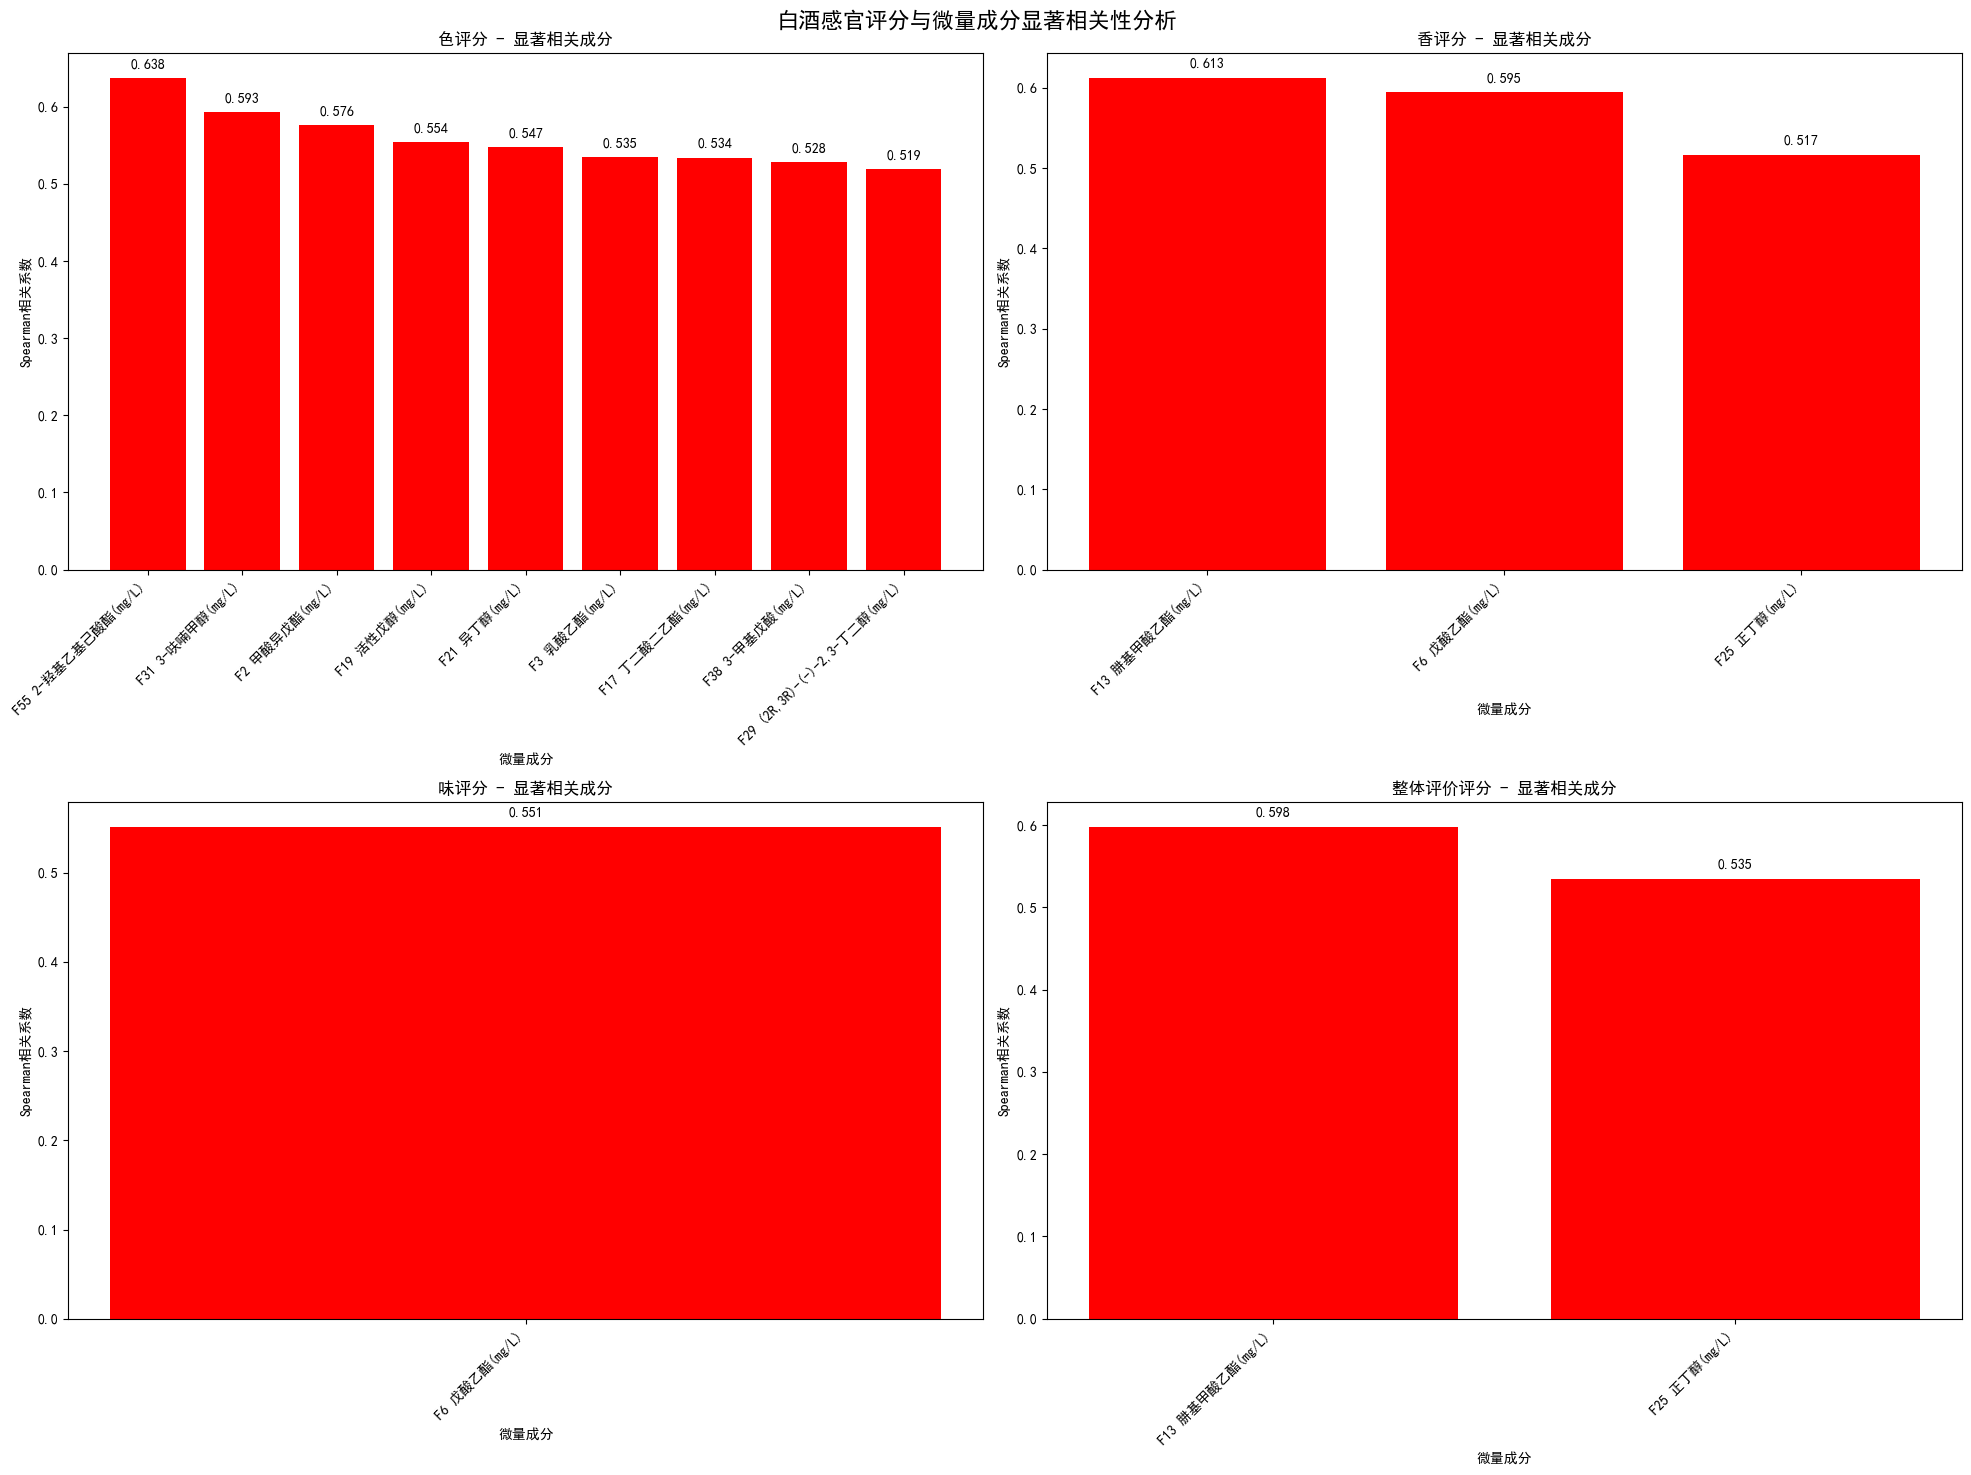

In [13]:
# 设置中文字体

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建相关性热力图
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('白酒感官评分与微量成分Spearman相关性分析', fontsize=16)

# 为每个感官评价指标绘制热力图
for i, score_col in enumerate(score_columns):
    ax = axes[i//2, i%2]
    
    # 获取前10个最相关的成分
    top_corr = correlation_results[score_col].head(10)
    
    # 创建热力图数据
    heatmap_data = top_corr.set_index('成分')['Spearman相关系数'].to_frame().T
    
    # 绘制热力图
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                ax=ax, cbar_kws={'label': 'Spearman相关系数'})
    
    ax.set_title(f'{score_col}评分与微量成分相关性 (前10)')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('result\\spearman_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("相关性热力图已保存为 spearman_correlation_heatmap.png")

# 绘制显著相关成分的柱状图
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('白酒感官评分与微量成分显著相关性分析', fontsize=16)

# 为每个感官评价指标绘制柱状图（仅显示显著相关的成分）
for i, score_col in enumerate(score_columns):
    ax = axes[i//2, i%2]
    
    # 筛选显著相关的成分
    significant_corr = correlation_results[score_col][correlation_results[score_col]['显著性'] == True]
    
    if len(significant_corr) > 0:
        # 提取成分名称（简化显示）
        component_names = [comp.split()[0] + " " + comp.split()[1] if len(comp.split()) > 1 else comp[:15] 
                          for comp in significant_corr['成分']]
        
        # 绘制柱状图
        bars = ax.bar(range(len(significant_corr)), significant_corr['Spearman相关系数'], 
                     color=['red' if corr > 0 else 'blue' for corr in significant_corr['Spearman相关系数']])
        
        ax.set_xlabel('微量成分')
        ax.set_ylabel('Spearman相关系数')
        ax.set_title(f'{score_col}评分 - 显著相关成分')
        ax.set_xticks(range(len(significant_corr)))
        ax.set_xticklabels(component_names, rotation=45, ha='right')
        
        # 添加数值标签
        for j, (bar, corr) in enumerate(zip(bars, significant_corr['Spearman相关系数'])):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if corr > 0 else -0.03),
                   f'{corr:.3f}', ha='center', va='bottom' if corr > 0 else 'top')
        
        ax.axhline(y=0, color='black', linewidth=0.5)
    else:
        ax.text(0.5, 0.5, '无显著相关成分', horizontalalignment='center', 
                verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'{score_col}评分 - 显著相关成分')

plt.tight_layout()
plt.savefig('result\\significant_correlations.png', dpi=300, bbox_inches='tight')
print("显著相关性柱状图已保存为 significant_correlations.png")

In [14]:
# 总结关键发现
def summarize_key_findings(correlation_results):
    """总结关键发现"""
    
    print("\n" + "=" * 80)
    print("                            关键发现总结")
    print("=" * 80)
    
    # 1. 最重要的相关成分
    print("\n1. 最重要的相关成分:")
    important_components = set()
    for score_col in score_columns:
        significant_corr = correlation_results[score_col][correlation_results[score_col]['显著性'] == True]
        for _, row in significant_corr.iterrows():
            important_components.add((row['成分'], row['Spearman相关系数'], score_col))
    
    # 按相关性强度排序
    sorted_components = sorted(important_components, key=lambda x: abs(x[1]), reverse=True)
    for comp, corr, score_col in sorted_components[:10]:
        direction = "正相关" if corr > 0 else "负相关"
        print(f"  • {comp}: 与{score_col}评分{direction} (r={corr:.3f})")
    
    # 2. 各项评分的关键发现
    print("\n2. 各项评分的关键发现:")
    
    # 色评分
    color_significant = correlation_results['色'][correlation_results['色']['显著性'] == True]
    if len(color_significant) > 0:
        print(f"  • 色评分: 有{len(color_significant)}个成分与其显著相关，其中F55 2-羟基乙基己酸酯相关性最强(r=0.638)")
    
    # 香评分
    aroma_significant = correlation_results['香'][correlation_results['香']['显著性'] == True]
    if len(aroma_significant) > 0:
        print(f"  • 香评分: 有{len(aroma_significant)}个成分与其显著相关，其中F13 肼基甲酸乙酯相关性最强(r=0.613)")
    
    # 味评分
    taste_significant = correlation_results['味'][correlation_results['味']['显著性'] == True]
    if len(taste_significant) > 0:
        print(f"  • 味评分: 有{len(taste_significant)}个成分与其显著相关，其中F6 戊酸乙酯相关性最强(r=0.551)")
    
    # 整体评价
    overall_significant = correlation_results['整体评价'][correlation_results['整体评价']['显著性'] == True]
    if len(overall_significant) > 0:
        print(f"  • 整体评价: 有{len(overall_significant)}个成分与其显著相关，其中F13 肼基甲酸乙酯相关性最强(r=0.598)")
    
    # 3. 共同相关成分
    print("\n3. 多项评分共同相关的成分:")
    component_effects = {}
    for score_col in score_columns:
        significant_corr = correlation_results[score_col][correlation_results[score_col]['显著性'] == True]
        for _, row in significant_corr.iterrows():
            comp_name = row['成分']
            if comp_name not in component_effects:
                component_effects[comp_name] = []
            component_effects[comp_name].append((score_col, row['Spearman相关系数']))
    
    # 找出影响多项评分的成分
    multi_effect_components = {comp: effects for comp, effects in component_effects.items() if len(effects) > 1}
    for comp, effects in multi_effect_components.items():
        print(f"  • {comp}: 影响{len(effects)}项评分")
        for score_col, corr in effects:
            direction = "正向" if corr > 0 else "负向"
            print(f"    - 对{score_col}评分有{direction}影响 (r={corr:.3f})")

# 生成总结
summarize_key_findings(correlation_results)


                            关键发现总结

1. 最重要的相关成分:
  • F55 2-羟基乙基己酸酯(mg/L): 与色评分正相关 (r=0.638)
  • F13 肼基甲酸乙酯(mg/L): 与香评分正相关 (r=0.613)
  • F13 肼基甲酸乙酯(mg/L): 与整体评价评分正相关 (r=0.598)
  • F6 戊酸乙酯(mg/L): 与香评分正相关 (r=0.595)
  • F31 3-呋喃甲醇(mg/L): 与色评分正相关 (r=0.593)
  • F2 甲酸异戊酯(mg/L): 与色评分正相关 (r=0.576)
  • F19 活性戊醇(mg/L): 与色评分正相关 (r=0.554)
  • F6 戊酸乙酯(mg/L): 与味评分正相关 (r=0.551)
  • F21 异丁醇(mg/L): 与色评分正相关 (r=0.547)
  • F3 乳酸乙酯(mg/L): 与色评分正相关 (r=0.535)

2. 各项评分的关键发现:
  • 色评分: 有9个成分与其显著相关，其中F55 2-羟基乙基己酸酯相关性最强(r=0.638)
  • 香评分: 有3个成分与其显著相关，其中F13 肼基甲酸乙酯相关性最强(r=0.613)
  • 味评分: 有1个成分与其显著相关，其中F6 戊酸乙酯相关性最强(r=0.551)
  • 整体评价: 有2个成分与其显著相关，其中F13 肼基甲酸乙酯相关性最强(r=0.598)

3. 多项评分共同相关的成分:
  • F13 肼基甲酸乙酯(mg/L): 影响2项评分
    - 对香评分有正向影响 (r=0.613)
    - 对整体评价评分有正向影响 (r=0.598)
  • F6 戊酸乙酯(mg/L): 影响2项评分
    - 对香评分有正向影响 (r=0.595)
    - 对味评分有正向影响 (r=0.551)
  • F25 正丁醇(mg/L): 影响2项评分
    - 对香评分有正向影响 (r=0.517)
    - 对整体评价评分有正向影响 (r=0.535)
